In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

import mne


fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
fnirs_cw_amplitude_dir = fnirs_data_folder / "Participant-1"
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)
raw_intensity.load_data()

Loading /Users/bryan/mne_data/MNE-fNIRS-motor-data/Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

In [4]:
type(raw_intensity)
raw_intensity.annotations

<Annotations | 92 segments: 1.0 (30), 15.0 (2), 2.0 (30), 3.0 (30)>

In [2]:
paul = mne.io.read_raw_snirf("./paul2.snirf")

Loading /Users/bryan/work/dsp/paul2.snirf


In [6]:
paul

<RawSNIRF | paul2.snirf, 32 x 4841 (484.0 s), ~49 kB, data not loaded>

In [7]:
8*60

480

In [8]:
paul.annotations

<Annotations | 132 segments: counting7 (132)>

In [10]:
picks = mne.pick_types(raw_intensity.info, meg=False, fnirs=True)
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

<Info | 9 non-empty values
 bads: []
 ch_names: S1_D1 760, S1_D1 850, S1_D2 760, S1_D2 850, S1_D3 760, S1_D3 ...
 chs: 56 fNIRS (CW amplitude)
 custom_ref_applied: False
 dig: 31 items (3 Cardinal, 28 EEG)
 highpass: 0.0 Hz
 lowpass: 3.9 Hz
 meas_date: 2019-11-02 13:16:16 UTC
 nchan: 56
 projs: []
 sfreq: 7.8 Hz
 subject_info: 4 items (dict)
>

In [12]:
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)


In [13]:
raw_od

<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

In [14]:
raw_od.ch_names

['S1_D1 760',
 'S1_D1 850',
 'S1_D2 760',
 'S1_D2 850',
 'S1_D3 760',
 'S1_D3 850',
 'S1_D9 760',
 'S1_D9 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D3 760',
 'S2_D3 850',
 'S2_D4 760',
 'S2_D4 850',
 'S2_D10 760',
 'S2_D10 850',
 'S3_D2 760',
 'S3_D2 850',
 'S3_D3 760',
 'S3_D3 850',
 'S3_D11 760',
 'S3_D11 850',
 'S4_D3 760',
 'S4_D3 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D12 760',
 'S4_D12 850',
 'S5_D5 760',
 'S5_D5 850',
 'S5_D6 760',
 'S5_D6 850',
 'S5_D7 760',
 'S5_D7 850',
 'S5_D13 760',
 'S5_D13 850',
 'S6_D5 760',
 'S6_D5 850',
 'S6_D7 760',
 'S6_D7 850',
 'S6_D8 760',
 'S6_D8 850',
 'S6_D14 760',
 'S6_D14 850',
 'S7_D6 760',
 'S7_D6 850',
 'S7_D7 760',
 'S7_D7 850',
 'S7_D15 760',
 'S7_D15 850',
 'S8_D7 760',
 'S8_D7 850',
 'S8_D8 760',
 'S8_D8 850',
 'S8_D16 760',
 'S8_D16 850']

In [15]:
paul.ch_names

['S1_D1 735',
 'S1_D2 735',
 'S1_D3 735',
 'S1_D4 735',
 'S2_D1 735',
 'S2_D2 735',
 'S2_D3 735',
 'S2_D4 735',
 'S3_D5 735',
 'S3_D6 735',
 'S3_D7 735',
 'S3_D8 735',
 'S4_D5 735',
 'S4_D6 735',
 'S4_D7 735',
 'S4_D8 735',
 'S1_D1 850',
 'S1_D2 850',
 'S1_D3 850',
 'S1_D4 850',
 'S2_D1 850',
 'S2_D2 850',
 'S2_D3 850',
 'S2_D4 850',
 'S3_D5 850',
 'S3_D6 850',
 'S3_D7 850',
 'S3_D8 850',
 'S4_D5 850',
 'S4_D6 850',
 'S4_D7 850',
 'S4_D8 850']

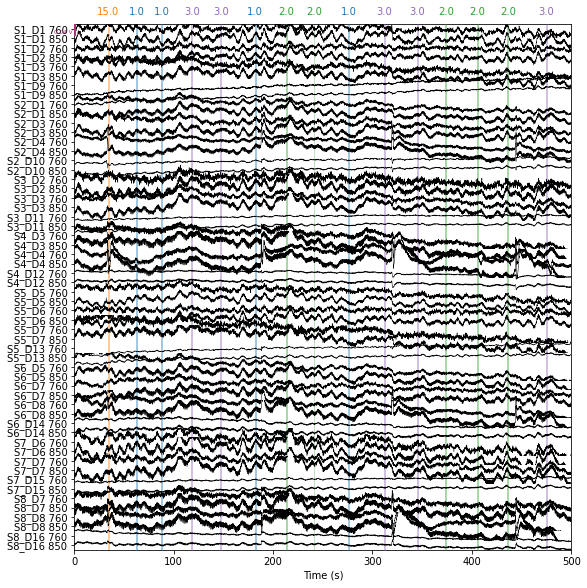

In [17]:
raw_od.plot(n_channels=len(raw_od.ch_names), duration=500, show_scrollbars=False);

Reading 0 ... 4840  =      0.000 ...   484.000 secs...


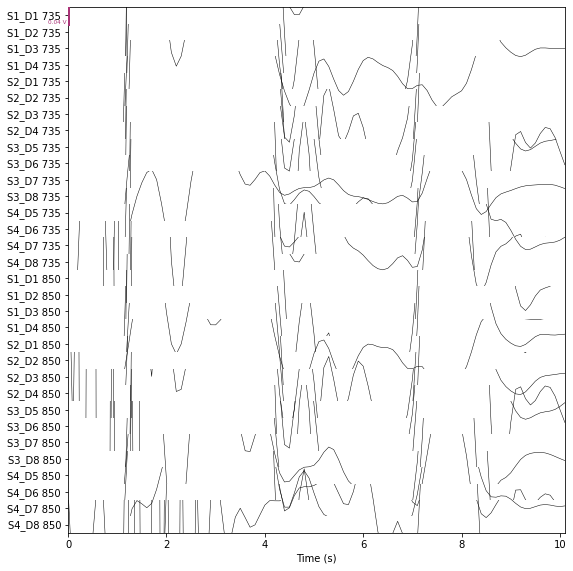

In [20]:
paul_raw_od = mne.preprocessing.nirs.optical_density(paul)
paul_raw_od.plot(n_channels=len(paul_raw_od.ch_names), duration=10, show_scrollbars=False);

In [23]:
paul_raw_od.times

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 4.838e+02, 4.839e+02,
       4.840e+02])

[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

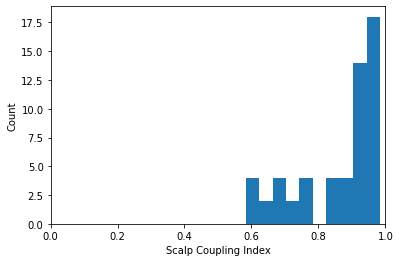

In [24]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)
fig, ax = plt.subplots()
ax.hist(sci)
ax.set(xlabel="Scalp Coupling Index", ylabel="Count", xlim=[0, 1])


In [26]:
len(sci)

56

In [27]:
paul_sci = mne.preprocessing.nirs.scalp_coupling_index(paul_raw_od)


In [28]:
paul_sci

array([ 0.85522522,  0.99307229,  0.96144238,  0.63137774,  0.86814624,
        0.58469496,  0.80242869,  0.76268182,  0.81912454,  0.07436181,
        0.60759956,  0.59832157,  0.77472404,  0.29817932, -0.00930428,
        0.07661573,  0.85522522,  0.99307229,  0.96144238,  0.63137774,
        0.86814624,  0.58469496,  0.80242869,  0.76268182,  0.81912454,
        0.07436181,  0.60759956,  0.59832157,  0.77472404,  0.29817932,
       -0.00930428,  0.07661573])

[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

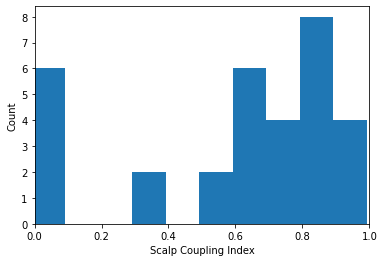

In [29]:
fig, ax = plt.subplots()
ax.hist(paul_sci)
ax.set(xlabel="Scalp Coupling Index", ylabel="Count", xlim=[0, 1])

In [30]:
len(paul_sci)

32

In [32]:
paul_sci < 0.6

array([False, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True,  True])

In [35]:
raw_od.ch_names

['S1_D1 760',
 'S1_D1 850',
 'S1_D2 760',
 'S1_D2 850',
 'S1_D3 760',
 'S1_D3 850',
 'S1_D9 760',
 'S1_D9 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D3 760',
 'S2_D3 850',
 'S2_D4 760',
 'S2_D4 850',
 'S2_D10 760',
 'S2_D10 850',
 'S3_D2 760',
 'S3_D2 850',
 'S3_D3 760',
 'S3_D3 850',
 'S3_D11 760',
 'S3_D11 850',
 'S4_D3 760',
 'S4_D3 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D12 760',
 'S4_D12 850',
 'S5_D5 760',
 'S5_D5 850',
 'S5_D6 760',
 'S5_D6 850',
 'S5_D7 760',
 'S5_D7 850',
 'S5_D13 760',
 'S5_D13 850',
 'S6_D5 760',
 'S6_D5 850',
 'S6_D7 760',
 'S6_D7 850',
 'S6_D8 760',
 'S6_D8 850',
 'S6_D14 760',
 'S6_D14 850',
 'S7_D6 760',
 'S7_D6 850',
 'S7_D7 760',
 'S7_D7 850',
 'S7_D15 760',
 'S7_D15 850',
 'S8_D7 760',
 'S8_D7 850',
 'S8_D8 760',
 'S8_D8 850',
 'S8_D16 760',
 'S8_D16 850']

In [36]:
sci

array([0.64451388, 0.64451388, 0.82855814, 0.82855814, 0.73965774,
       0.73965774, 0.58274491, 0.58274491, 0.9536225 , 0.9536225 ,
       0.88337935, 0.88337935, 0.98409562, 0.98409562, 0.92169739,
       0.92169739, 0.67823929, 0.67823929, 0.87238821, 0.87238821,
       0.8636861 , 0.8636861 , 0.94439075, 0.94439075, 0.98238431,
       0.98238431, 0.97920112, 0.97920112, 0.61204262, 0.61204262,
       0.77762416, 0.77762416, 0.67654918, 0.67654918, 0.90613474,
       0.90613474, 0.95180484, 0.95180484, 0.93318584, 0.93318584,
       0.97626613, 0.97626613, 0.94300376, 0.94300376, 0.74896185,
       0.74896185, 0.92355509, 0.92355509, 0.9316356 , 0.9316356 ,
       0.93526179, 0.93526179, 0.97442709, 0.97442709, 0.97223285,
       0.97223285])

In [37]:
paul_sci

array([ 0.85522522,  0.99307229,  0.96144238,  0.63137774,  0.86814624,
        0.58469496,  0.80242869,  0.76268182,  0.81912454,  0.07436181,
        0.60759956,  0.59832157,  0.77472404,  0.29817932, -0.00930428,
        0.07661573,  0.85522522,  0.99307229,  0.96144238,  0.63137774,
        0.86814624,  0.58469496,  0.80242869,  0.76268182,  0.81912454,
        0.07436181,  0.60759956,  0.59832157,  0.77472404,  0.29817932,
       -0.00930428,  0.07661573])

In [38]:
paul_raw_od

<RawSNIRF | paul2.snirf, 32 x 4841 (484.0 s), ~1.2 MB, data loaded>

In [42]:
from mne.preprocessing.nirs import _validate_nirs_info
# picks = _validate_nirs_info(raw.info, fnirs="od", which="Scalp coupling index")

In [43]:
picks = _validate_nirs_info(paul_raw_od.info, fnirs="od", which="Scalp coupling index")

In [44]:
picks

array([ 0, 16,  1, 17,  2, 18,  3, 19,  4, 20,  5, 21,  6, 22,  7, 23,  8,
       24,  9, 25, 10, 26, 11, 27, 12, 28, 13, 29, 14, 30, 15, 31])

In [45]:
paul_raw_od.ch_names

['S1_D1 735',
 'S1_D2 735',
 'S1_D3 735',
 'S1_D4 735',
 'S2_D1 735',
 'S2_D2 735',
 'S2_D3 735',
 'S2_D4 735',
 'S3_D5 735',
 'S3_D6 735',
 'S3_D7 735',
 'S3_D8 735',
 'S4_D5 735',
 'S4_D6 735',
 'S4_D7 735',
 'S4_D8 735',
 'S1_D1 850',
 'S1_D2 850',
 'S1_D3 850',
 'S1_D4 850',
 'S2_D1 850',
 'S2_D2 850',
 'S2_D3 850',
 'S2_D4 850',
 'S3_D5 850',
 'S3_D6 850',
 'S3_D7 850',
 'S3_D8 850',
 'S4_D5 850',
 'S4_D6 850',
 'S4_D7 850',
 'S4_D8 850']

In [47]:
paul_sci

array([ 0.85522522,  0.99307229,  0.96144238,  0.63137774,  0.86814624,
        0.58469496,  0.80242869,  0.76268182,  0.81912454,  0.07436181,
        0.60759956,  0.59832157,  0.77472404,  0.29817932, -0.00930428,
        0.07661573,  0.85522522,  0.99307229,  0.96144238,  0.63137774,
        0.86814624,  0.58469496,  0.80242869,  0.76268182,  0.81912454,
        0.07436181,  0.60759956,  0.59832157,  0.77472404,  0.29817932,
       -0.00930428,  0.07661573])